# Learning and Decision Making

## Laboratory 5: The Taxi Problem Revisited

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab5-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The MDP Model 

In this lab you will implement several reinforcement learning algorithms, and use a small version of the taxi domain, from Lab 2, to test and compare these algorithms. Don't forget, however, that your functions should work for **any MDP** and not just the one provided. 

The small taxi domain to be used is represented in the diagram below.

<img src="small_taxi.png" width="150px">

In the small taxi domain above,

* The taxi can be in any of the 9 cells in the diagram. The passenger can be at any of the 2 marked locations ($R$, $B$) or in the taxi. Additionally, the passenger wishes to go to one of the 2 possible destinations. The total number of states, in this case, is $9\times 4 + 1 = 37$.
* At each step, the agent (taxi driver) may move in any of the four directions -- north, south, east and west. It can also try to pickup the passenger or drop off the passenger. 
* The goal of the taxi driver is to pickup the passenger and drop it at the passenger's desired destination.

$$\diamond$$

We start by loading the MDP for the small taxi domain from the file `small_taxi.npz`. The file contains both the MDP, described as a tuple like those from Lab 2, and the corresponding optimal $Q$-function.

In [7]:
import numpy as np

mdp_info = np.load('small_taxi.npz', allow_pickle=True)

# The MDP is a tuple (S, A, P, c, gamma)
M = mdp_info['M']

# We also load the optimal Q-function for the MDP
Q = mdp_info['Qopt']

In this first activity, you will implement a function that enables you to sample a transition from a given MDP. You will then use this function, in future activities, to generate the data that your agent will use to learn.

---

#### Activity 1.        

Write a function named `sample_transition` that receives, as input, a tuple representing an arbitrary MDP as well as two integers, `s` and `a`, corresponding to the indices of a state and an action. The tuple describing the MDP is similar to `M` in the example above and has 5 elements, where

* The first element is a tuple of strings, each string corresponding to a possible state;
* The second element is a tuple of strings, each string corresponding to a possible action;
* The third element is a tuple of `numpy` arrays, where the element $a$ corresponds to the transition probability matrix for action $a$;
* The fourth element is a `numpy` array with as many rows as states and as many columns as actions, and corresponds to the cost function for the MDP;
* Finally, the fifth element corresponds to the discount factor for the MDP.

Your function should return a tuple `(s, a, c, s')`, where `c` is the cost associated with performing the action with index `a` in the state with index `s`, and `s'` is the index of a state generated from `s` upon selecting action `a`, according to the transition probabilities for the MDP.

**Note:** Don't forget to import `numpy.random` to generate the state index `s'`.

---

In [8]:
import numpy.random as rnd

def sample_transition(mdp, s, a):
    cumulative = np.cumsum(mdp[2][a][s])
    random = rnd.rand()
    next_state = -1

    for i in range(len(cumulative)):
        if random < cumulative[i]:
            next_state = i
            break

    return (s, a, mdp[3][s][a], next_state)


rnd.seed(42)

# Select random state and action
s = rnd.randint(len(M[0]))
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(s, M[0][s], end=', ')
print(a, M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = rnd.randint(len(M[0]))
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(s, M[0][s], end=', ')
print(a, M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = rnd.randint(len(M[0]))
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(s, M[0][s], end=', ')
print(a, M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

Observed transition:
(28 (2, T, B), 2 East, 0.5, (3, T, B))
Observed transition:
(20 (3, T, R), 1 South, 0.5, (3, T, R))
Observed transition:
(10 (2, B, R), 2 East, 0.5, (3, B, R))


We provide below an example of application of the function with the MDP from `small_taxi.npz` that you can use as a first "sanity check" for your code. 

Do not worry if your random state/action generation leads to different outcomes. Use the states and actions provided and verify that the entries of your MDP match those in the examples.

```python
import numpy.random as rnd

rnd.seed(42)

# Select random state and action
s = rnd.randint(len(M[0]))
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(s, M[0][s], end=', ')
print(a, M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = rnd.randint(len(M[0]))
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(s, M[0][s], end=', ')
print(a, M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = rnd.randint(len(M[0]))
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(s, M[0][s], end=', ')
print(a, M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')
```

Output:

```
Observed transition:
(28 (2, T, B), 2 East, 0.5, (3, T, B))
Observed transition:
(20 (3, T, R), 1 South, 0.5, (3, T, R))
Observed transition:
(10 (2, B, R), 2 East, 0.5, (3, B, R))
```

All reinforcement learning algorithms that you will implement can only access the MDP through the function `sample_transition` which, in a sense, simulates an "interaction" of the agent with the environment.

---

#### Activity 2.        

Write down a function named `egreedy` that implements and $\epsilon$-greedy policy. Your function should receive, as input, a `numpy` array `Q` with shape `(N,)`, for some integer $N$, and, as an optional argument, a floating point number `eps` with a default value `eps=0.1`. Your function should return... 

* ... with a probability $\epsilon$, a random index between $0$ and $N-1$.
* ... with a probability $1-\epsilon$, the index between $0$ and $N-1$ corresponding to the minimum value of `Q`. If more than one such index exists, the function should **randomly** select among such indices.

In [9]:
def egreedy(Q, eps=0.1):
    if rnd.rand() < eps:
        return rnd.randint(len(Q))
    else:
        minimum = np.where(Q == Q.min())[0]
        return minimum[rnd.randint(len(minimum))]


rnd.seed(42)

# State 28
s = 28
a = egreedy(Q[s, :], eps=0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2
a = egreedy(Q[s, :], eps=0.5)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2
a = egreedy(Q[s, :], eps=1.0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2

# State 20
s = 20
a = egreedy(Q[s, :], eps=0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 3
a = egreedy(Q[s, :], eps=0.5)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2
a = egreedy(Q[s, :], eps=1.0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 1

# State 10
s = 10
a = egreedy(Q[s, :], eps=0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2 
a = egreedy(Q[s, :], eps=0.5)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 3
a = egreedy(Q[s, :], eps=1.0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 3

State: (2, T, B) - action: 2 East
State: (2, T, B) - action: 2 East
State: (2, T, B) - action: 4 Pickup
State: (3, T, R) - action: 3 West
State: (3, T, R) - action: 2 East
State: (3, T, R) - action: 4 Pickup
State: (2, B, R) - action: 2 East
State: (2, B, R) - action: 2 East
State: (2, B, R) - action: 1 South


We provide below an example of application of the function with the MDP from Activity 1. Again, use this example as a first "sanity check" for your code. You should obtain the same results when `eps=0`. As for the other examples, do not worry if your random state/action generation leads to different outcomes.

```python
rnd.seed(42)

# State 28
s = 28
a = egreedy(Q[s, :], eps=0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2
a = egreedy(Q[s, :], eps=0.5)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2
a = egreedy(Q[s, :], eps=1.0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2

# State 20
s = 20
a = egreedy(Q[s, :], eps=0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 3
a = egreedy(Q[s, :], eps=0.5)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2
a = egreedy(Q[s, :], eps=1.0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 1

# State 10
s = 10
a = egreedy(Q[s, :], eps=0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 2 
a = egreedy(Q[s, :], eps=0.5)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 3
a = egreedy(Q[s, :], eps=1.0)
print('State:', M[0][s], '- action:', a, M[1][a]) # Action 3
```

Output:

```
State: (2, T, B) - action: 2 East
State: (2, T, B) - action: 2 East
State: (2, T, B) - action: 2 East
State: (3, T, R) - action: 3 West
State: (3, T, R) - action: 2 East
State: (3, T, R) - action: 1 South
State: (2, B, R) - action: 2 East
State: (2, B, R) - action: 3 West
State: (2, B, R) - action: 3 West
```

---

#### Activity 3. 

Write a function `mb_learning` that implements the model-based reinforcement learning algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the example above. 
* An integer, `n`, corresponding to the number of steps that your algorithm should run.
*  A numpy array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.
* A tuple, `Pinit`, with as many elements as the number of actions in `mdp`. Each element of `Pinit` corresponds to a square numpy array with as many rows/columns as the number of states in `mdp` and can be **any** transition probability matrix. The matrices in `Pinit` should be used to initialize the transition probability matrices of the model being learned by your function.
* A numpy array `cinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `cinit` should be used to initialize the cost function of the model being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment. From this interaction, your function should implement the model-based RL algorithm seen in class. In particular, it should learn the transition probabilities and cost function from the interaction between the agent and the environment, and use these to compute the optimal $Q$-function. The transition probabilities, cost and $Q$-functions to be learned should be initialized using `Pinit`, `cinit` and `qinit`, respectively. 

Note that, at each step of the interaction,

* The agent should observe the current state, $s$, and select an action $a$ using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. 
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the transition probabilities, cost function, and $Q$-function.
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

Your function should return a tuple containing:

*  A numpy array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.
* A tuple with as many elements as the number of actions in `mdp`. The element $a$ of the tuple corresponds to a square numpy array with as many rows/columns as the number of states in `mdp`, corresponding to the learned transition probabilities for action $a$.
* A numpy array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned cost function.

---

In [13]:
def mb_learning(mdp, n, qinit, Pinit, cinit):
    Nt = {}
    g = mdp[4]
    s = rnd.randint(len(mdp[0]))
    q = qinit
    p = Pinit
    c = cinit

    for state in range(len(mdp[0])):
        for action in range(len(mdp[1])):
            Nt[(state, action)] = 0

    for t in range(n):
        a = egreedy(q[s], eps=0.15)
        data = sample_transition(mdp, s, a)
        step = 1 / (Nt[(s, a)] + 1)

        c[s][a] = c[s][a] + step*(data[2] - c[s][a])

        for j in range(len(p[a][s])):
            i = 1 if j == data[3] else 0
            p[a][s][j] = p[a][s][j] + step*(i - p[a][s][j])

        q_min = np.array([[np.amin(x)] for x in q])
        q[:,a] = c[:,a] + g*p[a][s].dot(q_min)

        Nt[(s, a)] += 1
        s = data[3]

    return (q, p, c)


rnd.seed(42)

# Initialize transition probabilities
pinit = (np.eye(len(M[0])),) * len(M[1])

# Initialize cost function
cinit = np.zeros((len(M[0]), len(M[1])))

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qinit, pinit, cinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Q))

# Run 1000 additional steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qnew, pnew, cnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Q))

Error in Q after 1000 steps: 49.75850625357651
Error in Q after 2000 steps: 46.91041629489261


As an example, you can observe how the error in the estimated $Q$-values evolves with the amount of training. Do not worry if you don't get exactly the same values.

```python
rnd.seed(42)

# Initialize transition probabilities
pinit = (np.eye(len(M[0])),) * len(M[1])

# Initialize cost function
cinit = np.zeros((len(M[0]), len(M[1])))

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qinit, pinit, cinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Q))

# Run 1000 additional steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qnew, pnew, cnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Q))
```

Output: 
```
Error in Q after 1000 steps: 49.529110264127944
Error in Q after 2000 steps: 39.756231115219606
```

### 3. Model-free learning

You will now implement both $Q$-learning and SARSA.

---

#### Activity 4. 

Write a function `qlearning` that implements the $Q$-learning algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the examples above. 
* An integer, `n`, corresponding to the number of steps that your algorithm should run.
*  A `numpy` array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment. From this interaction, your function should implement the $Q$-learning algorithm seen in class. In particular, it should learn the optimal $Q$-function. The $Q$-function to be learned should be initialized using `qinit`. 

Note that, at each step of the interaction,

* The agent should observe the current state, $s$, and select an action $a$ using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. 
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the $Q$-function.
* When updating the component $(s,a)$ of $Q$, use the step-size $\alpha=0.3$.

Your function should return a `numpy` array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.

---

In [11]:
def qlearning(mdp, n, qinit):
    s = rnd.randint(len(mdp[0]))
    g = mdp[4]
    step = 0.3
    q = qinit
    
    for t in range(n):
        a = egreedy(q[s], eps=0.15)
        data = sample_transition(mdp, s, a)
        
        q[s][a] = q[s][a] + step*(data[2] + g*np.amin(q[data[3]]) - q[s][a])
        
        s = data[3]
    
    return q


rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = qlearning(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Q))

# Run 1000 additional steps of model-based learning
qnew = qlearning(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Q))

Error in Q after 1000 steps: 49.83364062298515
Error in Q after 2000 steps: 43.659222897046696


We can observe how the error in the estimated $Q$-values evolves with the amount of training. Do not worry if you don't get exactly the same values.

```python
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = qlearning(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Q))

# Run 1000 additional steps of model-based learning
qnew = qlearning(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Q))
```

Output: 
```
Error in Q after 1000 steps: 49.48476011362147
Error in Q after 2000 steps: 44.932803920823055
```

---

#### Activity 5. 

Write a function `sarsa` that implements the SARSA algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the examples above. 
* An integer, `n`, corresponding to the number of steps that your algorithm should run.
*  A `numpy` array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment. From this interaction, your function should implement the SARSA algorithm seen in class. The $Q$-function to be learned should be initialized using `qinit`. 

Note that, at each step of the interaction,

* The agent should observe the current state, $s$, and the action $a$ previously selected for this state. If no action has been previously selected, select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. **Do not adjust the value of $\epsilon$ during learning.**
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* After observing the next state, select the corresponding action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. Use the function `egreedy` from Activity 2, with $\epsilon=0.15$.
* With this transition information (state, action, cost, next-state, next-action), you can now perform an update to the $Q$-function.
* When updating the components $(s,a)$ of $Q$, use the step-size $\alpha=0.3$.

Your function should return a `numpy` array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.

---

In [12]:
def sarsa(mdp, n, qinit):
    s = rnd.randint(len(mdp[0]))
    q = qinit
    a = egreedy(q[s], eps=0.15)
    step = 0.3
    g = mdp[4]
    
    for t in range(n):
        data = sample_transition(mdp, s, a)
        next_a = egreedy(q[data[3]], eps=0.15)
        
        q[s][a] = q[s][a] + step*(data[2] + g*q[data[3]][next_a] - q[s][a])
        
        s = data[3]
        a = next_a
        
    return q


rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = sarsa(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Q))

# Run 1000 additional steps of model-based learning
qnew = sarsa(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Q))

Error in Q after 1000 steps: 49.832172890639924
Error in Q after 2000 steps: 47.88379226349531


Again, you can observe how the error in the estimated $Q$-values evolves with the amount of training. Do not worry if you don't get exactly the same values.

```python
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = sarsa(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Q))

# Run 1000 additional steps of model-based learning
qnew = sarsa(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Q))
```

Output: 
```
Error in Q after 1000 steps: 49.721125901543196
Error in Q after 2000 steps: 47.46986233947668
```

We can run a more comprehensive study of how the different methods perform, by running the following code.

```python
%matplotlib notebook

import matplotlib.pyplot as plt

STEPS = 100
ITERS = 100
RUNS  = 30

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Q) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

for n in range (RUNS):

    # Initialization
    pmb = (np.eye(len(M[0])),) * len(M[1])
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Q - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Q - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Q - qss)
        
Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')
plt.show()
```

Output: 

<img src="plot.jpg">

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

<span style="color:blue">The Q-function obtained through the model based learning presents a lower error than in the Q-functions obtained through the Q-learning and SARSA since it uses the transition probability function in combination with the cost function in order to obtain the Q-function. This leads to a more precise result since it's the same method that is used in the calculation of the optimal Q-function through value iteration in the MDPs. Also Q-learning and SARSA methods don't allow for an exact representation of the optimal Q-function and must resort to some form of approximation.</span>

<IPython.core.display.Javascript object>


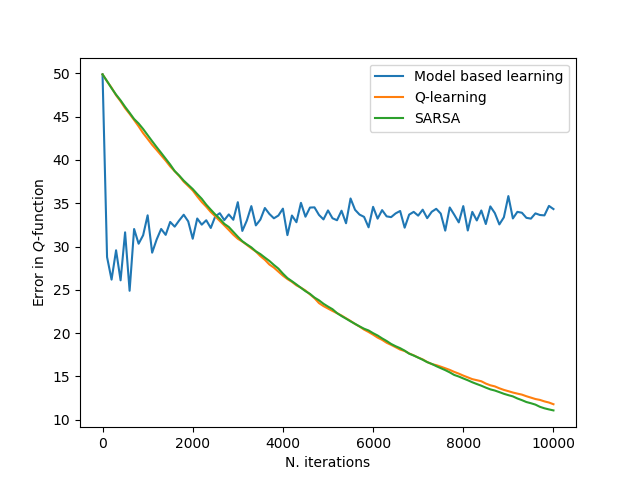

In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt

STEPS = 100
ITERS = 100
RUNS  = 30

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Q) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

for n in range (RUNS):

    # Initialization
    pmb = (np.eye(len(M[0])),) * len(M[1])
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Q - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Q - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Q - qss)

Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')
plt.show()